 # Computer Assignment 4, Machine Learning
 ### The purpose of this project is to get familier with machine learning methods with the help of SciKit-Learn Library.

## Introducing the data set
The data set includes the characteristics of different houses, including streets, neighborhoods, services, number of rooms, type of building, year of construction, etc., and the target data is the price of the house.

In [1]:
import pandas as pd

TRAIN_FILE_ADDRESS = 'house-prices-advanced-regression-techniques/train.csv'
TEST_FILE_ADDRESS = 'house-prices-advanced-regression-techniques/test.csv'

In [52]:
train_data = pd.read_csv(TRAIN_FILE_ADDRESS)
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [40]:
test_data = pd.read_csv(TEST_FILE_ADDRESS)
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Phase 0, Visualization and EDA

### 1 - 

- As we know Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [4]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- Also Pandas dataframe.info() function is used to get a concise summary of the dataframe.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2 -

Below is the percentage of missing data for each column in descending order.
But its meaning is different for different columns. According to the data file description, this value has a special meaning for a number of columns.
In column PoolQC, for example, this value means no pool, not missing data.

In [6]:
missing_value_percentage = train_data.isnull().sum() * 100 / len(train_data)
train_data_missing_values = pd.DataFrame()
train_data_missing_values['missing value percentage'] = missing_value_percentage
train_data_missing_values['column name'] = train_data.columns

train_data_missing_values.sort_values('missing value percentage', inplace=True, ascending=False)
train_data_missing_values

,missing value percentage,column name
PoolQC,99.520548,PoolQC
MiscFeature,96.301370,MiscFeature
Alley,93.767123,Alley
Fence,80.753425,Fence
FireplaceQu,47.260274,FireplaceQu
...,...,...
ExterQual,0.000000,ExterQual
Exterior2nd,0.000000,Exterior2nd
Exterior1st,0.000000,Exterior1st
RoofMatl,0.000000,RoofMatl


### 3 -

As we know correlation is a statistic that measures the degree to which two variables move in relation to each other.
So we need to find the features that have the most correlation with the target column. According to the following diagrams and numbers, these four features are equal to:

- OverallQual
- GrLivArea
- GarageCars
- GarageArea

<AxesSubplot:>

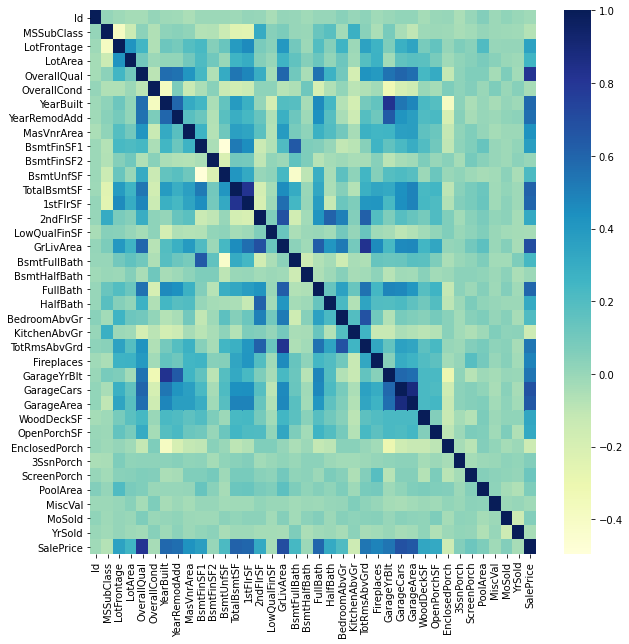

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(), cmap="YlGnBu")

In [11]:
train_data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

### 4 -

Yes, Taking a logarithm makes the relationship linear, and since X shows the linear relationship between the two variables, by applying the logarithm function, this relationship becomes more linear and we can rely more on its values.

<AxesSubplot:>

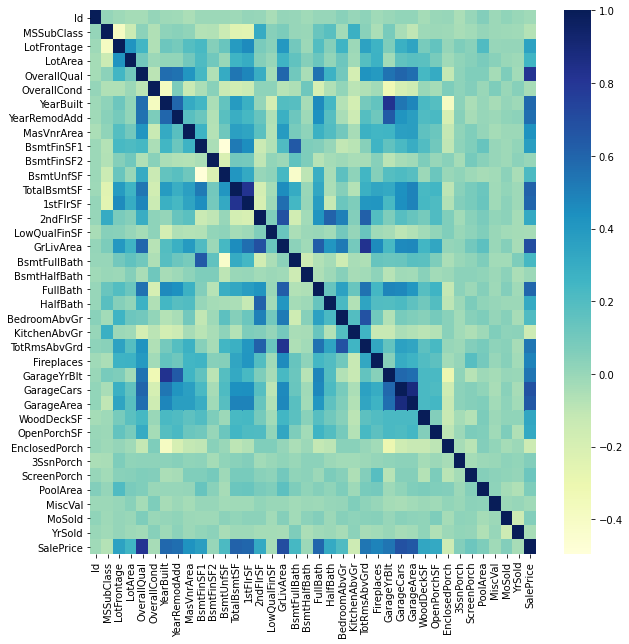

In [50]:
import numpy as np

log_train_data = train_data
log_train_data['SalePrice'] = np.log2(train_data['SalePrice'])

plt.figure(figsize=(10,10))
sns.heatmap(log_train_data.corr(), cmap="YlGnBu")

In [13]:
log_train_data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.814790
GrLivArea        0.696648
GarageCars       0.680087
GarageArea       0.649467
TotalBsmtSF      0.608866
FullBath         0.593850
1stFlrSF         0.593226
YearBuilt        0.588027
YearRemodAdd     0.566881
GarageYrBlt      0.542726
TotRmsAbvGrd     0.531796
Fireplaces       0.488364
MasVnrArea       0.424924
BsmtFinSF1       0.369378
LotFrontage      0.354168
WoodDeckSF       0.332999
OpenPorchSF      0.318562
2ndFlrSF         0.317535
HalfBath         0.314676
LotArea          0.255209
BsmtFullBath     0.235637
BsmtUnfSF        0.220911
BedroomAbvGr     0.211982
ScreenPorch      0.121469
PoolArea         0.068329
MoSold           0.057420
3SsnPorch        0.055358
BsmtFinSF2       0.006367
BsmtHalfBath    -0.003492
Id              -0.017263
MiscVal         -0.019933
OverallCond     -0.031804
YrSold          -0.037950
LowQualFinSF    -0.038503
MSSubClass      -0.072328
KitchenAbvGr    -0.147187
EnclosedPorch   -0.149920
Name: SalePr

### 5 -
No, because in this way only the relationship between numerical values and the target column can be investigated, and in fact qualitative values are not considered.

### 6 -

Here we want to examine the relationship of some data columns with the target column in more detail.
We use Scatter and Hexbin for this purpose.

A scatter plot is a type of plot that shows the data as a collection of points. The position of a point depends on its two-dimensional value, where each value is a position on either the horizontal or vertical dimension.

The hexbin() function in pyplot module of matplotlib library is used to make a 2D hexagonal binning plot of points x, y.

####  OverallQual :

This column rates the overall material and finish of the house.

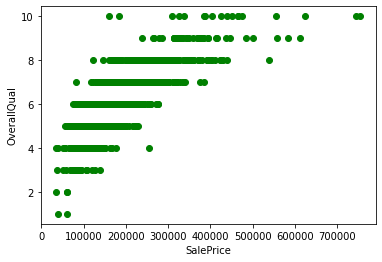

In [53]:
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.scatter(train_data['SalePrice'], train_data['OverallQual'], c ='green')

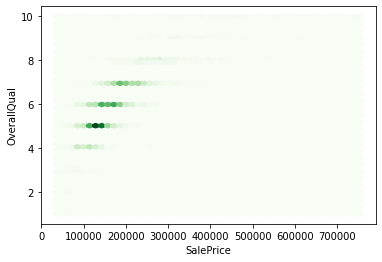

In [42]:
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.hexbin(train_data['SalePrice'], train_data['OverallQual'], gridsize = 50, cmap ='Greens')

#### GrLivArea :

This column shows above grade (ground) living area square feet.

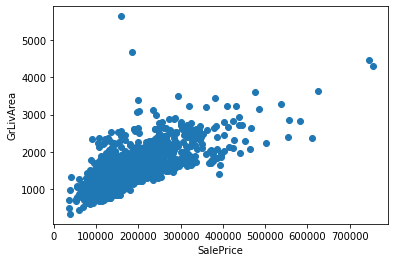

In [43]:
plt.xlabel('SalePrice')
plt.ylabel('GrLivArea')
plt.scatter(train_data['SalePrice'], train_data['GrLivArea'])

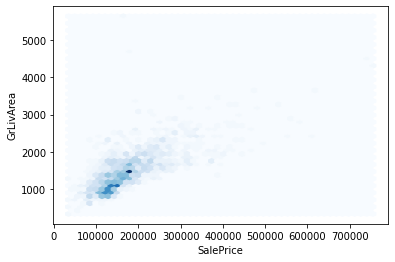

In [44]:
plt.xlabel('SalePrice')
plt.ylabel('GrLivArea')
plt.hexbin(train_data['SalePrice'], train_data['GrLivArea'], gridsize = 50, cmap ='Blues')

#### GarageCars :

This column shows size of garage in car capacity.

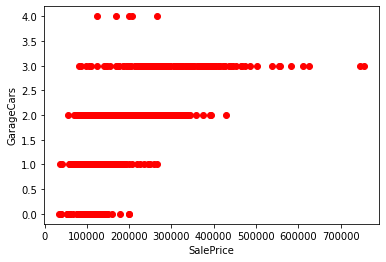

In [45]:
plt.xlabel('SalePrice')
plt.ylabel('GarageCars')
plt.scatter(train_data['SalePrice'], train_data['GarageCars'], c='red')

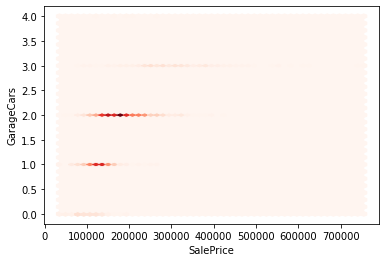

In [46]:
plt.xlabel('SalePrice')
plt.ylabel('GarageCars')
plt.hexbin(train_data['SalePrice'], train_data['GarageCars'], gridsize = 50, cmap ='Reds')

#### GarageArea :

This colums shows Size of garage in square feet.

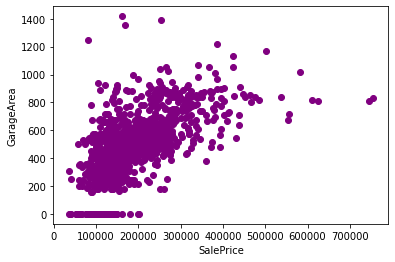

In [47]:
plt.xlabel('SalePrice')
plt.ylabel('GarageArea')
plt.scatter(train_data['SalePrice'], train_data['GarageArea'], c='purple')

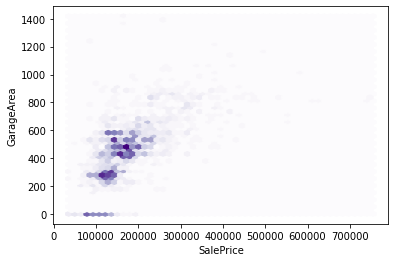

In [48]:
plt.xlabel('SalePrice')
plt.ylabel('GarageArea')
plt.hexbin(train_data['SalePrice'], train_data['GarageArea'], gridsize = 50, cmap ='Purples')

The more linear the relationship between the variable we choose and the target variable, the less error we can use that variable to predict the target variable.

### 7 -

By examining non-numerical data and considering the description of each data column, I think the following columns can have a greater importance and impact on price.

#### Utilities :
This column shows type of utilities available.

Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64

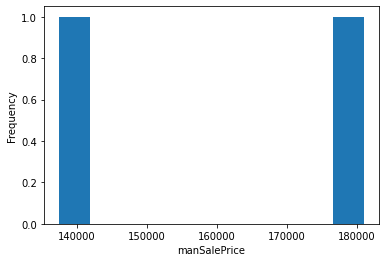

In [55]:
mean_utilities = train_data.groupby('Utilities')['SalePrice'].mean()
hist = mean_utilities.plot.hist()
hist.set_xlabel('manSalePrice')
mean_utilities

#### Neighborhood :
This column shows physical locations within Ames city limits.

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

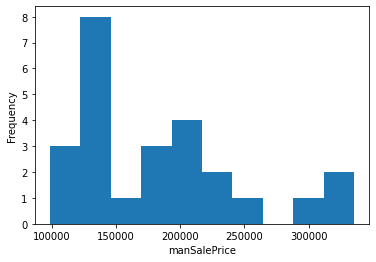

In [56]:
mean_neighborhood = train_data.groupby('Neighborhood')['SalePrice'].mean()
hist = mean_neighborhood.plot.hist()
hist.set_xlabel('manSalePrice')
mean_neighborhood

#### HouseStyle :
This column shows style of dwelling.

HouseStyle
1.5Fin    143116.740260
1.5Unf    110150.000000
1Story    175985.477961
2.5Fin    220000.000000
2.5Unf    157354.545455
2Story    210051.764045
SFoyer    135074.486486
SLvl      166703.384615
Name: SalePrice, dtype: float64

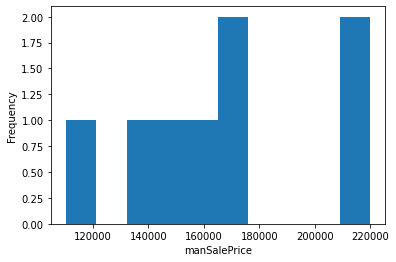

In [57]:
mean_houseStyle = train_data.groupby('HouseStyle')['SalePrice'].mean()
hist = mean_houseStyle.plot.hist()
hist.set_xlabel('manSalePrice')
mean_houseStyle

## Phase 1, Preprocessing

### 1 - 
#### Deleting Rows : <br>
BThis method commonly used to handle the null values. Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. Removing the data will lead to loss of information which will not give the expected results while predicting the output.

##### Pros : <br>
- Complete removal of data with missing values results in robust and highly accurate model
- Deleting a particular row or a column with no specific information is better, since it does not have a high weightage

##### Cons : <br>
- Loss of information and data
- Works poorly if the percentage of missing values is high (say 30%), compared to the whole dataset


#### Replacing With Mean/Median/Mode : <br>
This strategy can be applied on a feature which has numeric data like the age of a person or the ticket fare. We can calculate the mean, median or mode of the feature and replace it with the missing values. This is an approximation which can add variance to the data set. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns. Replacing with the above three approximations are a statistical approach of handling the missing values. This method is also called as leaking the data while training. Another way is to approximate it with the deviation of neighbouring values. This works better if the data is linear. 


##### Pros : <br>
- This is a better approach when the data size is small
- It can prevent data loss which results in removal of the rows and column


##### Cons : <br>
- Imputing the approximations add variance and bias
- Works poorly compared to other multiple-imputations method

#### Assigning An Unique Category : <br>
A categorical feature will have a definite number of possibilities, such as gender, for example. Since they have a definite number of classes, we can assign another class for the missing values. Here, the features Cabin and Embarked have missing values which can be replaced with a new category, say, U for ‘unknown’. This strategy will add more information into the dataset which will result in the change of variance.

##### Pros : <br>
- Less possibilities with one extra category, resulting in low variance after one hot encoding — since it is categorical
- Negates the loss of data by adding an unique category


##### Cons : <br>
- Adds less variance
- Adds another feature to the model while encoding, which may result in poor performance

#### Predicting The Missing Values : <br>
Using the features which do not have missing values, we can predict the nulls with the help of a machine learning algorithm. This method may result in better accuracy, unless a missing value is expected to have a very high variance.

##### Pros : <br>
- Imputing the missing variable is an improvement as long as the bias from the same is smaller than the omitted variable bias
- Yields unbiased estimates of the model parameters

##### Cons : <br>
- Bias also arises when an incomplete conditioning set is used for a categorical variable
- Considered only as a proxy for the true values

#### Using Algorithms Which Support Missing Values : <br>
KNN is a machine learning algorithm which works on the principle of distance measure. This algorithm can be used when there are nulls present in the dataset. Unfortunately, the SciKit Learn library for the K – Nearest Neighbour algorithm in Python does not support the presence of the missing values.

##### Pros : <br>
- Does not require creation of a predictive model for each attribute with missing data in the dataset
- Correlation of the data is neglected

##### Cons : <br>
- Is a very time consuming process and it can be critical in data mining where large databases are being extracted
- Choice of distance functions can be Euclidean, Manhattan etc. which is do not yield a robust result




### 2 - 
In general, data preprocessing is very much related to their type. For example, below X has the largest number of missing data. But this data is not lost and according to the data description file, houses that do not have a pool are shown with a null. So deleting this feature can have a detrimental effect.

In [59]:
train_data_missing_values.head(3)

,missing value percentage,column name
PoolQC,99.520548,PoolQC
MiscFeature,96.301370,MiscFeature
Alley,93.767123,Alley


### 3 -

#### Normalizing : </br>

“Normalizing” a vector most often means dividing by a norm of the vector. It also often refers to rescaling by the minimum and range of the vector, to make all the elements lie between 0 and 1 thus bringing all the values of numeric columns in the dataset to a common scale. </br>

Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.


#### Standardizing : </br>

“Standardizing” a vector most often means subtracting a measure of location and dividing by a measure of scale. For example, if the vector contains random values with a Gaussian distribution, you might subtract the mean and divide by the standard deviation, thereby obtaining a “standard normal” random variable with mean 0 and standard deviation 1.</br>

Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.



### 4 -

#### Label Encoding :</br>
Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.</br>

#### One-Hot Encoding :</br>
One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.</br>

No, not all categorical data need to be encoded in the same way. For example, here we used the Label Encoding for data with a maximum number of 2 category and the One-Hot Encoding for other group data.

### 5 -
The larger the number of data columns, the more complex the operation. So deleting some columns that do not help the model training can have a positive effect. For example, here, given the X-value of each attribute with the target column, we can see features that have very little effect and dependence on the target column and the probability. It is great that we can get better performance by removing them and not reduce the accuracy of the model.

### 6 -
We must choose a split percentage that meets your project’s objectives with considerations that include:

- Computational cost in training the model.
- Computational cost in evaluating the model.
- Training set representativeness.
- Test set representativeness.
</br>
Nevertheless, common split percentages include:
</br>

- Train: 80%, Test: 20%
- Train: 67%, Test: 33%
- Train: 50%, Test: 50%

</br>
The idea of “sufficiently large” is specific to each predictive modeling problem. It means that there is enough data to split the dataset into train and test datasets and each of the train and test datasets are suitable representations of the problem domain. This requires that the original dataset is also a suitable representation of the problem domain.

A suitable representation of the problem domain means that there are enough records to cover all common cases and most uncommon cases in the domain. This might mean combinations of input variables observed in practice. It might require thousands, hundreds of thousands, or millions of examples.

Conversely, the train-test procedure is not appropriate when the dataset available is small. The reason is that when the dataset is split into train and test sets, there will not be enough data in the training dataset for the model to learn an effective mapping of inputs to outputs. There will also not be enough data in the test set to effectively evaluate the model performance. The estimated performance could be overly optimistic (good) or overly pessimistic (bad).

If you have insufficient data, then a suitable alternate model evaluation procedure would be the k-fold cross-validation procedure.
</br>
The general procedure of k-fold cross-validation procedure is as follows:</br>
- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
- Take the group as a hold out or test data set
- Take the remaining groups as a training data set
- Fit a model on the training set and evaluate it on the test set
- Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores

Yes, it is better to have random division because the data may follow a certain order.

In [149]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

class Preprocessor:
    
    @staticmethod
    def split_data(data, testSize):
        train, test = train_test_split(data, random_state=41, test_size=testSize)
        return train, test
    
    @staticmethod
    def one_hot_encode(data, columns):
        labeled_data = data.copy()
        for column in columns:
          new_columns = pd.get_dummies(labeled_data[column], prefix=column)
          labeled_data = labeled_data.drop(columns =[column])
          labeled_data = pd.concat([labeled_data, new_columns], axis=1)
        return labeled_data
        
    
    @staticmethod
    def label_encode(data, columns):
        le = preprocessing.LabelEncoder()
        labeled_data = data.copy()
        for column in columns:
          labeled_data[column] = le.fit_transform(labeled_data[column])
        return labeled_data
    
    @staticmethod
    def encode_columns(data):
        one_hot_cols = []
        label_cols = []
        for col in data.columns:
            category_num = len(data[col].unique())
            if category_num > 2:
                one_hot_cols.append(col)
            else:
                label_cols.append(col)
        data = Preprocessor.one_hot_encode(data, one_hot_cols)
        data = Preprocessor.label_encode(data, label_cols)
        return data
    
    @staticmethod
    def load_data(file_address):
        return pd.read_csv(file_address)
    
    @staticmethod
    def normalize(data):
        data_copy = data.copy()
        scaler = StandardScaler() 
        return pd.DataFrame(scaler.fit_transform(data_copy),columns = data_copy.columns)
    
    @staticmethod
    def standardize(data):
        data_copy = data.copy()
        scaler = MinMaxScaler() 
        return pd.DataFrame(scaler.fit_transform(data_copy),columns = data_copy.columns)
        
    @staticmethod
    def preprocess(all_data, missing_value_mode, standardize, normalize, testSize):
        data = all_data.copy()
        data_numeric, data_categoric = Preprocessor.seperate_numeric_categoric(data)
        data_categoric = Preprocessor.fill_meaningful_na(data_categoric, 'Not_exist')
        data_categoric = Preprocessor.encode_columns(data_categoric)
        data_numeric = Preprocessor.handle_missing_values(data_numeric, missing_value_mode)
        if standardize : data_numeric = Preprocessor.standardize(data_numeric)
        if normalize : data_numeric = Preprocessor.normalize(data_numeric)
        data = pd.concat([data_numeric, data_categoric], axis = 1)
        train_part_data, test_part_data = Preprocessor.split_data(data, testSize)
        return train_part_data, test_part_data
    
    @staticmethod
    def seperate_numeric_categoric(data):
        categorical_columns = []
        numeric_columns = []
        for c in data.columns:
            if data[c].map(type).eq(str).any(): 
                categorical_columns.append(c)
            else:
                numeric_columns.append(c)
        return pd.DataFrame(data[numeric_columns]), pd.DataFrame(data[categorical_columns])
    
    @staticmethod
    def fill_meaningful_na(data, fill_value):
        return data.apply(lambda x: x.fillna(fill_value))
    
    @staticmethod
    def handle_missing_values(data, mode):
        if mode == 'median':
            data = data.apply(lambda x: x.fillna(x.median()))
        elif mode == 'mean':
            data = data.apply(lambda x: x.fillna(x.mean()))
        elif mode == 'mode':
            data = data.apply(lambda x: x.fillna(x.mode()))
        elif mode == 'drop-col':
            data = data.dropna(axis='columns')
        elif mode  == 'drop-row':
            data = data.dropna()
        return data



In [150]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

class Regressor:
    def __init__(self, data, target_column, model):        
        self.data = data
        self.model = model
        self.target_column = target_column
    
    def train(self):
        self.model.fit(self.train_data_x, self.train_data_y)
    
    def predict(self):
        self.train_data_result = self.model.predict(self.train_data_x)
        self.test_data_result = self.model.predict(self.test_data_x)

    def preprocess(self, missing_mode, do_standardize, do_normalize, test_size):
        self.train_data, self.test_data = Preprocessor.preprocess(self.data, missing_mode, do_standardize, do_normalize, test_size)
    
    def run(self, missing_value_mode, standardize, normalize, testSize):
        self.preprocess(missing_value_mode, standardize, normalize, testSize)
        self.seperate_target_column()
        self.train()
        self.predict()
        self.analyze()
    
    def analyze(self):
        self.train_MAE = mean_absolute_error(self.train_data_y, self.train_data_result) 
        self.train_RMSE = mean_squared_error(self.train_data_y, self.train_data_result, squared=False)
        self.test_MAE = mean_absolute_error(self.test_data_y, self.test_data_result) 
        self.test_RMSE = mean_squared_error(self.test_data_y, self.test_data_result, squared=False)
    
    def seperate_target_column(self):
        self.train_data_x = self.train_data.drop(columns =[self.target_column])
        self.train_data_y = self.train_data[self.target_column]
    
        self.test_data_x = self.test_data.drop(columns =[self.target_column])
        self.test_data_y = self.test_data[self.target_column]
    
    def get_metrics(self, mode):
        result = {}
        if mode == 'train':
            result['MAE'] = self.train_MAE
            result['RMSE'] = self.train_RMSE
        else :
            result['MAE'] = self.test_MAE
            result['RMSE'] = self.test_RMSE
        return result

In [185]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

class Analyzer:
    
    def __init__(self, data):
        self.knn_results = pd.DataFrame(columns=['k', 'train_MAE', 'train_RMSE', 'test_MAE', 'test_RMSE'])
        self.dt_results = pd.DataFrame(columns=['d', 'train_MAE', 'train_RMSE', 'test_MAE', 'test_RMSE'])
        self.lr_results = pd.DataFrame(columns=['train_MAE', 'train_RMSE', 'test_MAE', 'test_RMSE'])
        self.rf_d_results = pd.DataFrame(columns=['d', 'train_MAE', 'train_RMSE', 'test_MAE', 'test_RMSE'])
        self.rf_n_results = pd.DataFrame(columns=['n', 'train_MAE', 'train_RMSE', 'test_MAE', 'test_RMSE'])
        self.vr_results = pd.DataFrame(columns=['train_MAE', 'train_RMSE', 'test_MAE', 'test_RMSE'])
        self.data = data
        
    def analyze_knn(self, missing_value_mode, standardize, normalize, testSize, minK, maxK):
        for k in range(minK, maxK):
            knn = Regressor(self.data.copy(), 'SalePrice', KNeighborsRegressor(n_neighbors=k))
            knn.run(missing_value_mode, standardize, normalize, testSize)
            test_result = knn.get_metrics('test')
            train_result = knn.get_metrics('train')
            self.knn_results = self.knn_results.append({'k': k, 'train_MAE': train_result['MAE'], 'train_RMSE': train_result['RMSE'], 'test_MAE': test_result['MAE'], 'test_RMSE': test_result['RMSE']}, ignore_index=True)
        self.best_k = self.find_best_parameter(self.knn_results, 'k')
        self.print_bests(self.knn_results, 'k')
        self.plot_metrics(self.knn_results, 'k')
        self.knn_results = self.knn_results.iloc[0:0]
    
    def find_best_parameter(self, result, parameter):
        return result[result['test_RMSE'] == result['test_RMSE'].min()][parameter].iloc[0]
    
    def print_bests(self, result, parameter):
        best_rmse = result[result['test_RMSE'] == result['test_RMSE'].min()]
        print('best RMSE')
        print(best_rmse)
        best_mae = result[result['test_MAE'] == result['test_MAE'].min()]
        print('best MAE')
        print(best_mae)
    
    def analyze_dt(self, missing_value_mode, standardize, normalize, testSize, minD, maxD):
        for d in range(minD, maxD):
            dt = Regressor(self.data.copy(), 'SalePrice', DecisionTreeRegressor(random_state=0, max_depth = d))
            dt.run(missing_value_mode, standardize, normalize, testSize)
            test_result = dt.get_metrics('test')
            train_result = dt.get_metrics('train')
            self.dt_results = self.dt_results.append({'d': d, 'train_MAE': train_result['MAE'], 'train_RMSE': train_result['RMSE'], 'test_MAE': test_result['MAE'], 'test_RMSE': test_result['RMSE']}, ignore_index=True)
        self.best_d = self.find_best_parameter(self.dt_results, 'd')
        self.print_bests(self.dt_results, 'd')
        self.plot_metrics(self.dt_results, 'd')
        self.dt_results = self.dt_results.iloc[0:0]
    
    def analyze_rf(self, missing_value_mode, standardize, normalize, testSize, minD, maxD, minN, maxN):
        print('D :')
        for d in range(minD, maxD):
            rf = Regressor(self.data.copy(), 'SalePrice', RandomForestRegressor(max_depth=d, random_state=41))
            rf.run(missing_value_mode, standardize, normalize, testSize)
            test_result = rf.get_metrics('test')
            train_result = rf.get_metrics('train')
            self.rf_d_results = self.rf_d_results.append({'d': d, 'train_MAE': train_result['MAE'], 'train_RMSE': train_result['RMSE'], 'test_MAE': test_result['MAE'], 'test_RMSE': test_result['RMSE']}, ignore_index=True)
        self.print_bests(self.rf_d_results, 'n')
        self.plot_metrics(self.rf_d_results, 'd')
        self.rf_d_results = self.rf_d_results.iloc[0:0]
        
        print('N :')
        for n in range(minN, maxN):
            rf = Regressor(self.data.copy(), 'SalePrice', RandomForestRegressor(n_estimators=n, random_state=41))
            rf.run(missing_value_mode, standardize, normalize, testSize)
            test_result = rf.get_metrics('test')
            train_result = rf.get_metrics('train')
            self.rf_n_results = self.rf_n_results.append({'n': n, 'train_MAE': train_result['MAE'], 'train_RMSE': train_result['RMSE'], 'test_MAE': test_result['MAE'], 'test_RMSE': test_result['RMSE']}, ignore_index=True)
        self.print_bests(self.rf_n_results, 'n')
        self.plot_metrics(self.rf_n_results, 'n')
        self.rf_n_results = self.rf_n_results.iloc[0:0]
    
    def analyze_lr(self, missing_value_mode, standardize, normalize, testSize):
        lr = Regressor(self.data.copy(), 'SalePrice', LinearRegression())
        lr.run(missing_value_mode, standardize, normalize, testSize)
        test_result = lr.get_metrics('test')
        train_result = lr.get_metrics('train')
        self.lr_results = self.lr_results.append({'train_MAE': train_result['MAE'], 'train_RMSE': train_result['RMSE'], 'test_MAE': test_result['MAE'], 'test_RMSE': test_result['RMSE']}, ignore_index=True)
        print(self.lr_results)
        self.lr_results = self.lr_results.iloc[0:0]
    
    def analyze_vr(self, missing_value_mode, standardize, normalize, testSize, best_k, best_d):
        vr = Regressor(self.data, 'SalePrice', VotingRegressor(estimators=[('kn', KNeighborsRegressor(n_neighbors=best_k)), ('lr', LinearRegression()), ('dt', DecisionTreeRegressor(random_state=0, max_depth = best_d))]))
        vr.run(missing_value_mode, standardize, normalize, testSize)
        test_result = vr.get_metrics('test')
        train_result = vr.get_metrics('train')
        self.vr_results = self.vr_results.append({'train_MAE': train_result['MAE'], 'train_RMSE': train_result['RMSE'], 'test_MAE': test_result['MAE'], 'test_RMSE': test_result['RMSE']}, ignore_index=True)
        print(self.vr_results)
        self.vr_results = self.vr_results.iloc[0:0]
    
            
    def plot_metrics(self, result, parameter):   
        fig, (ax1, ax2) = plt.subplots(2)
        fig.set_figheight(10)
        fig.set_figwidth(12)
        fig.tight_layout(pad=5.0)

        metric = 'MAE'
        ax1.plot(result[parameter], result['train_' + metric], result['test_' + metric])
        ax1.set_title(metric)
        ax1.set_xlabel('parameter')
        ax1.legend(['train', 'test'])
        
        metric = 'RMSE'
        ax2.plot(result[parameter], result['train_' + metric], result['test_' + metric])
        ax2.set_title(metric)
        ax2.set_xlabel('parameter')
        ax2.legend(['train', 'test'])
        
        fig.show()


## KNN

here k is number of neighbors.

In [186]:
analyzer = Analyzer(train_data)

- missing_value_mode='median', standardize=False, normalize=False

best RMSE
     k     train_MAE    train_RMSE      test_MAE     test_RMSE
4  5.0  25528.392564  40850.561221  28979.275799  40797.940073
best MAE
     k     train_MAE    train_RMSE      test_MAE     test_RMSE
4  5.0  25528.392564  40850.561221  28979.275799  40797.940073


<ipython-input-122-02b80490fff3>:105: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


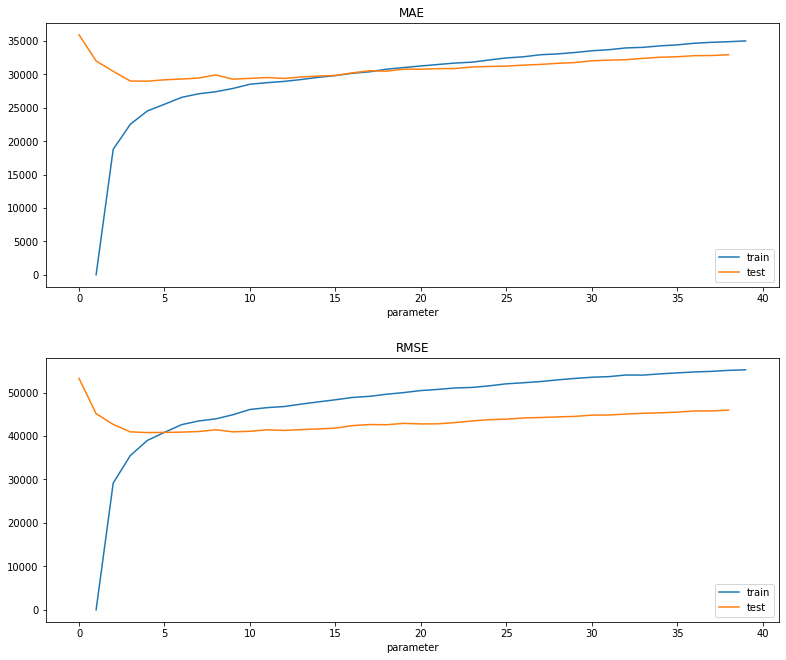

In [124]:
analyzer.analyze_knn(missing_value_mode='median', 
                     standardize=False, 
                     normalize=False, 
                     testSize=0.3, 
                     minK=1, 
                     maxK=40)

- missing_value_mode='mean', standardize=False, normalize=False

best RMSE
     k     train_MAE    train_RMSE      test_MAE     test_RMSE
4  5.0  25510.584344  40771.611078  29023.476712  40829.860817
best MAE
     k     train_MAE    train_RMSE      test_MAE     test_RMSE
4  5.0  25510.584344  40771.611078  29023.476712  40829.860817


<ipython-input-122-02b80490fff3>:105: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


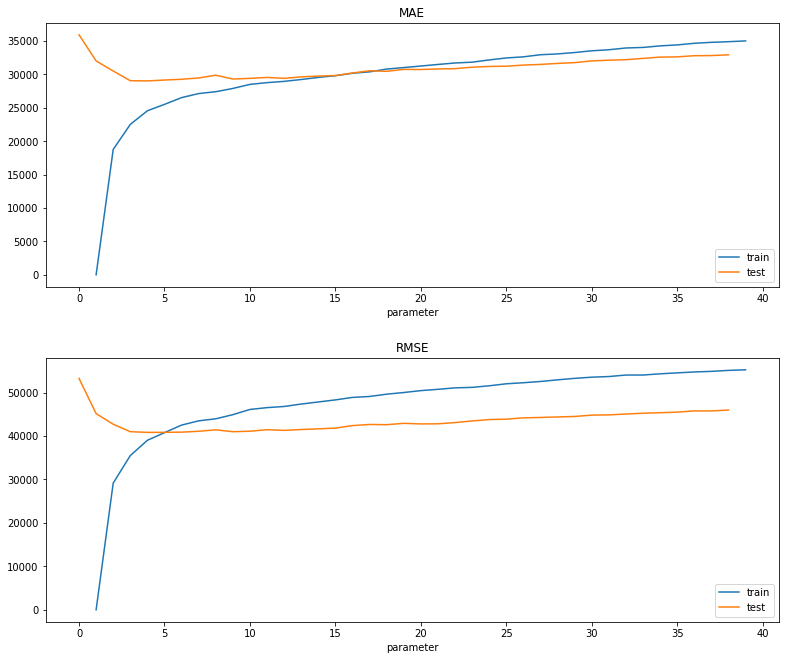

In [125]:
analyzer.analyze_knn(missing_value_mode='mean', 
                     standardize=False, 
                     normalize=False, 
                     testSize=0.3, 
                     minK=1, 
                     maxK=40)

- missing_value_mode='drop-col', standardize=False, normalize=False

best RMSE
     k     train_MAE    train_RMSE     test_MAE     test_RMSE
4  5.0  25716.611546  40529.918804  29149.79589  40690.682293
best MAE
     k     train_MAE    train_RMSE     test_MAE     test_RMSE
4  5.0  25716.611546  40529.918804  29149.79589  40690.682293


<ipython-input-122-02b80490fff3>:105: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


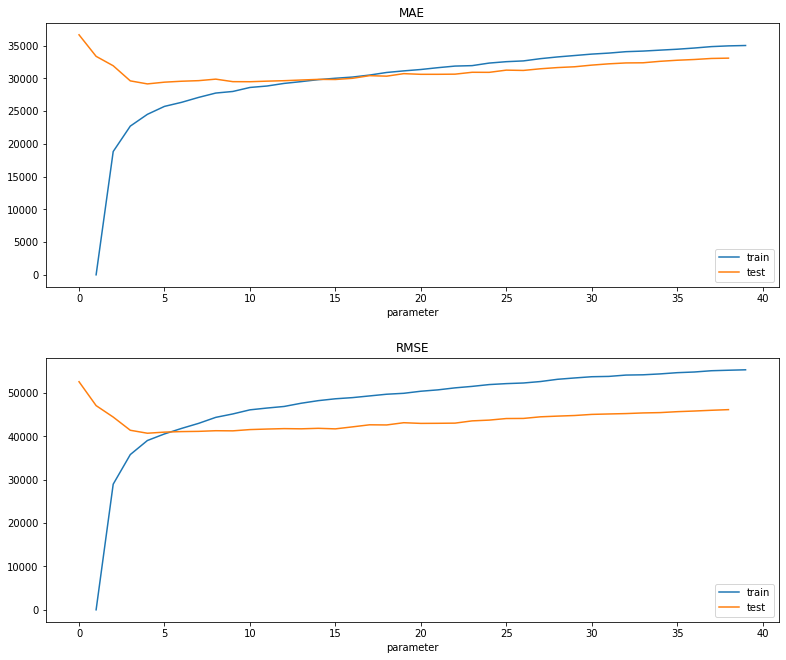

In [130]:
analyzer.analyze_knn(missing_value_mode='drop-col', 
                     standardize=False, 
                     normalize=False, 
                     testSize=0.3, 
                     minK=1, 
                     maxK=40)

- missing_value_mode='median', standardize=True, normalize=False

best RMSE
     k  train_MAE  train_RMSE  test_MAE  test_RMSE
7  8.0   0.032063    0.053678  0.033545   0.049018
best MAE
     k  train_MAE  train_RMSE  test_MAE  test_RMSE
7  8.0   0.032063    0.053678  0.033545   0.049018


<ipython-input-141-02b80490fff3>:105: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


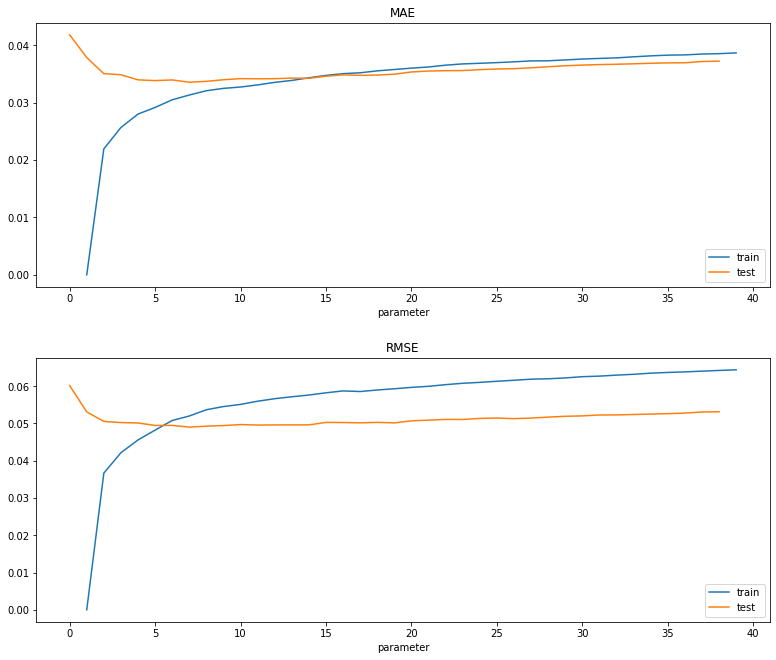

In [143]:
analyzer.analyze_knn(missing_value_mode='median', 
                     standardize=True, 
                     normalize=False, 
                     testSize=0.3, 
                     minK=1, 
                     maxK=40)

- missing_value_mode='median', standardize=False, normalize=True

best RMSE
     k  train_MAE  train_RMSE  test_MAE  test_RMSE
2  3.0   0.207611    0.373035  0.256852   0.367108
best MAE
     k  train_MAE  train_RMSE  test_MAE  test_RMSE
6  7.0    0.24785    0.465066  0.250229    0.37245


<ipython-input-151-02b80490fff3>:105: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


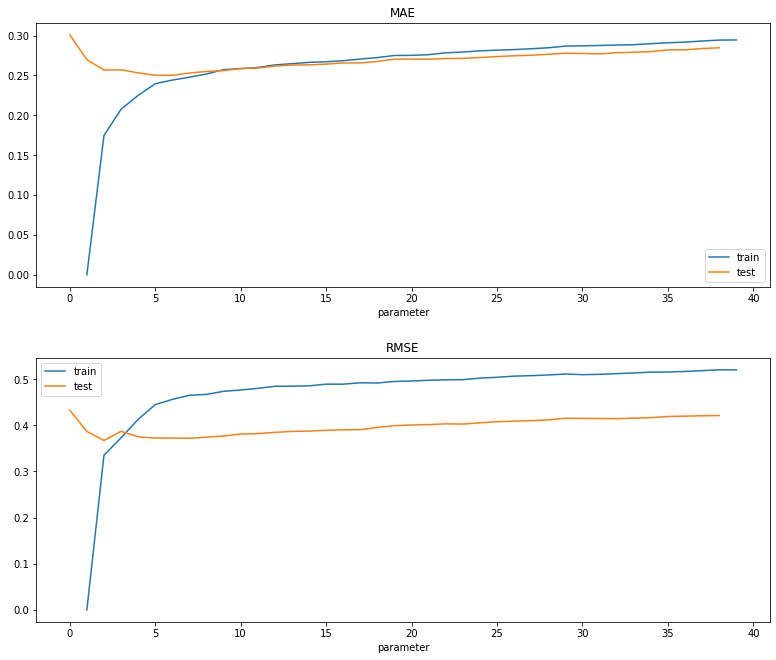

In [153]:
analyzer.analyze_knn(missing_value_mode='median', 
                     standardize=False, 
                     normalize=True, 
                     testSize=0.3, 
                     minK=1, 
                     maxK=40)

## DT

here d is max depth of tree.

- missing_value_mode='median', standardize=False, normalize=False

best RMSE
       d  train_MAE  train_RMSE      test_MAE     test_RMSE
22  23.0  41.349828  265.866489  27056.177647  40762.570294
best MAE
       d  train_MAE  train_RMSE      test_MAE     test_RMSE
22  23.0  41.349828  265.866489  27056.177647  40762.570294


<ipython-input-159-e30d3f99ec7a>:110: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


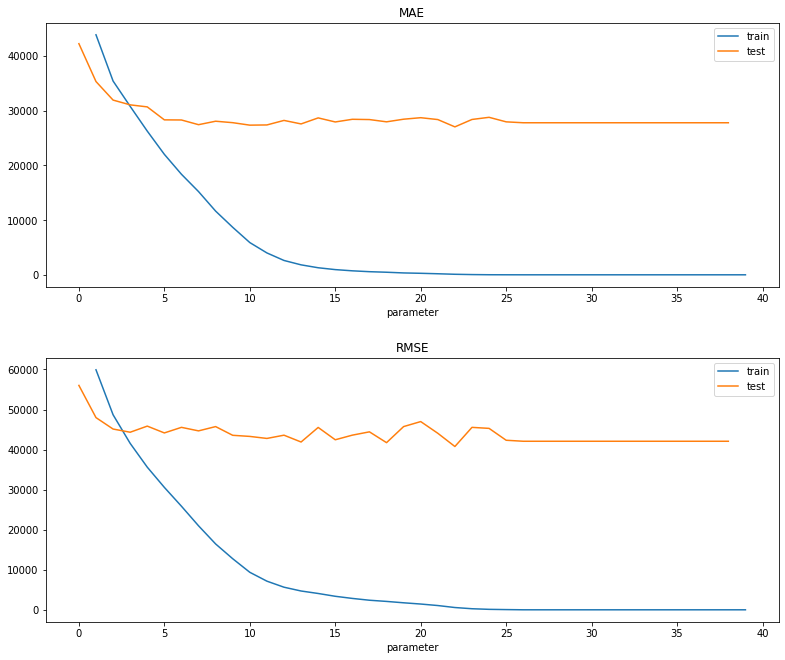

In [161]:
analyzer.analyze_dt(missing_value_mode='median', 
                     standardize=False, 
                     normalize=False, 
                     testSize=0.3, 
                     minD=1, 
                     maxD=40)

- missing_value_mode='mean', standardize=False, normalize=False

best RMSE
       d   train_MAE  train_RMSE      test_MAE     test_RMSE
21  22.0  108.601249  683.277617  26727.375951  40531.501915
best MAE
       d   train_MAE  train_RMSE      test_MAE     test_RMSE
21  22.0  108.601249  683.277617  26727.375951  40531.501915


<ipython-input-159-e30d3f99ec7a>:110: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


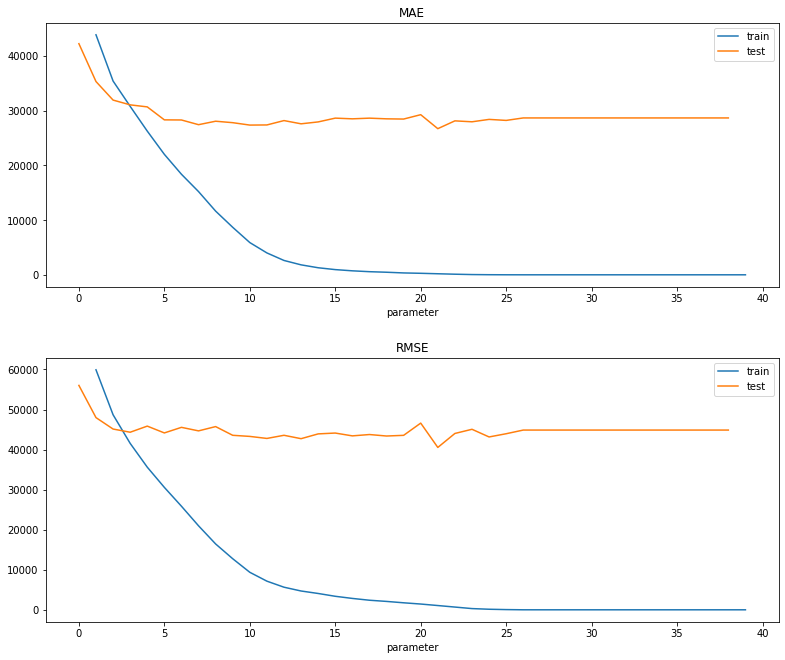

In [162]:
analyzer.analyze_dt(missing_value_mode='mean', 
                     standardize=False, 
                     normalize=False, 
                     testSize=0.3, 
                     minD=1, 
                     maxD=40)

- missing_value_mode='drop-col', standardize=False, normalize=False

best RMSE
     d    train_MAE    train_RMSE      test_MAE    test_RMSE
6  7.0  15260.69916  21003.982422  27182.219731  42112.40669
best MAE
     d    train_MAE    train_RMSE      test_MAE    test_RMSE
6  7.0  15260.69916  21003.982422  27182.219731  42112.40669


<ipython-input-159-e30d3f99ec7a>:110: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


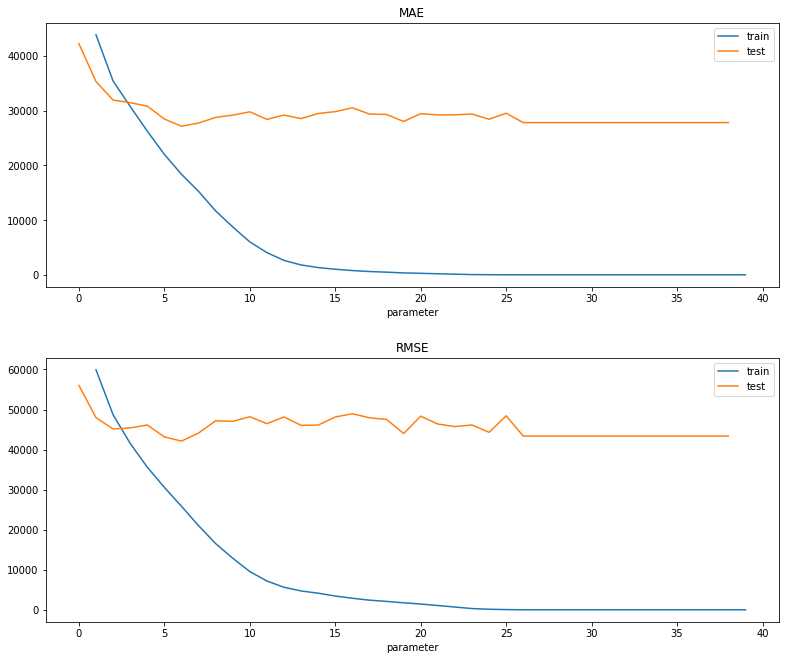

In [163]:
analyzer.analyze_dt(missing_value_mode='drop-col', 
                     standardize=False, 
                     normalize=False, 
                     testSize=0.3, 
                     minD=1, 
                     maxD=40)

- missing_value_mode='median', standardize=True, normalize=False

best RMSE
       d  train_MAE  train_RMSE  test_MAE  test_RMSE
26  27.0        0.0         0.0   0.03841   0.058494
27  28.0        0.0         0.0   0.03841   0.058494
28  29.0        0.0         0.0   0.03841   0.058494
29  30.0        0.0         0.0   0.03841   0.058494
30  31.0        0.0         0.0   0.03841   0.058494
31  32.0        0.0         0.0   0.03841   0.058494
32  33.0        0.0         0.0   0.03841   0.058494
33  34.0        0.0         0.0   0.03841   0.058494
34  35.0        0.0         0.0   0.03841   0.058494
35  36.0        0.0         0.0   0.03841   0.058494
36  37.0        0.0         0.0   0.03841   0.058494
37  38.0        0.0         0.0   0.03841   0.058494
38  39.0        0.0         0.0   0.03841   0.058494
best MAE
     d  train_MAE  train_RMSE  test_MAE  test_RMSE
7  8.0   0.016176    0.022829   0.03755   0.058667


<ipython-input-159-e30d3f99ec7a>:110: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


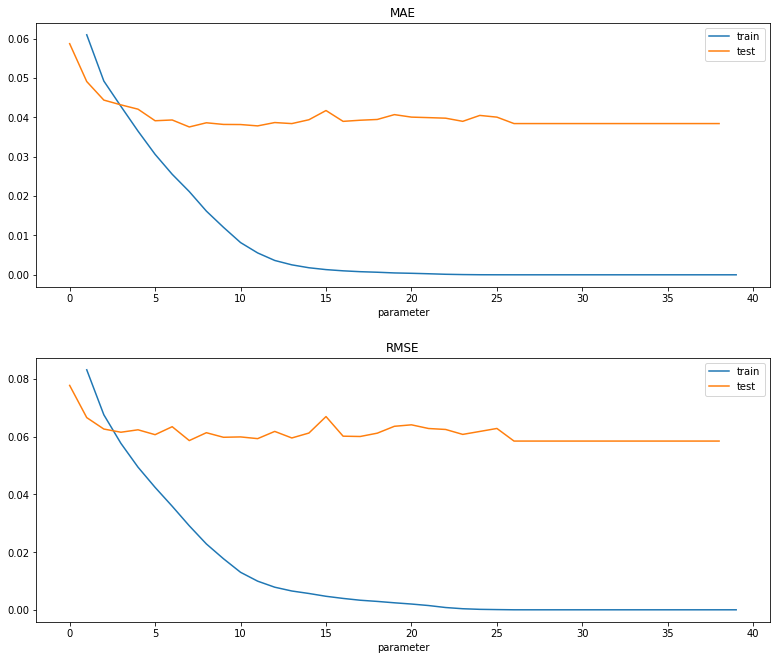

In [164]:
analyzer.analyze_dt(missing_value_mode='median', 
                     standardize=True, 
                     normalize=False, 
                     testSize=0.3, 
                     minD=1, 
                     maxD=40)

- missing_value_mode='median', standardize=False, normalize=True

best RMSE
     d  train_MAE  train_RMSE  test_MAE  test_RMSE
5  6.0   0.231541    0.325563   0.34935   0.529939
best MAE
      d  train_MAE  train_RMSE  test_MAE  test_RMSE
9  10.0   0.074224    0.117884  0.337235   0.534086


<ipython-input-159-e30d3f99ec7a>:110: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


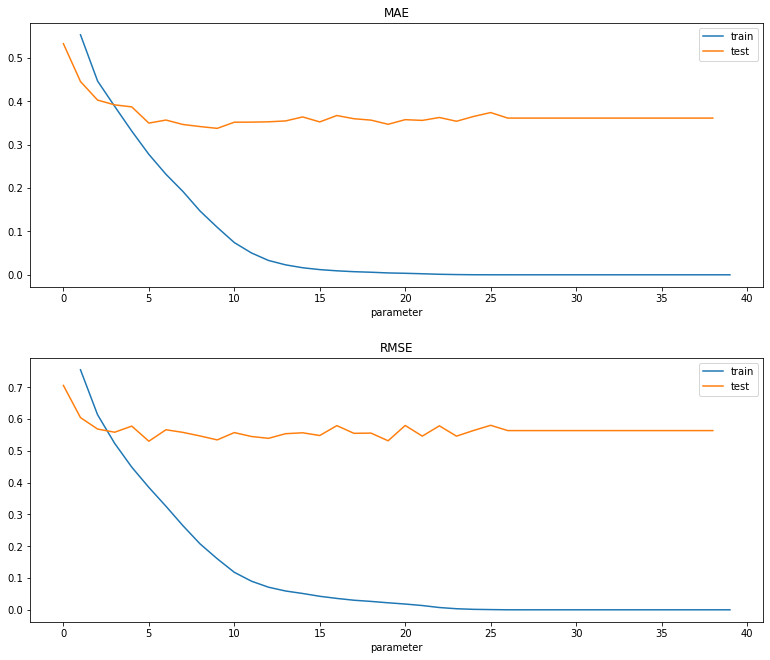

In [165]:
analyzer.analyze_dt(missing_value_mode='median', 
                     standardize=False, 
                     normalize=True, 
                     testSize=0.3, 
                     minD=1, 
                     maxD=40)

## LR

- missing_value_mode='median', standardize=False, normalize=False

In [166]:
analyzer.analyze_lr(missing_value_mode='median', 
                     standardize=False, 
                     normalize=False, 
                     testSize=0.3)

     train_MAE    train_RMSE      test_MAE     test_RMSE
0  12731.82796  19784.574191  19914.184473  54974.901743


- missing_value_mode='median', standardize=False, normalize=False

In [167]:
analyzer.analyze_lr(missing_value_mode='mean', 
                     standardize=False, 
                     normalize=False, 
                     testSize=0.3)

      train_MAE    train_RMSE      test_MAE     test_RMSE
0  12732.521594  19784.391059  19914.465242  54978.099144


- missing_value_mode='median', standardize=False, normalize=False

In [168]:
analyzer.analyze_lr(missing_value_mode='drop-col', 
                     standardize=False, 
                     normalize=False, 
                     testSize=0.3)

     train_MAE    train_RMSE      test_MAE     test_RMSE
0  12777.34194  19970.456756  19834.648925  53035.371009


- missing_value_mode='median', standardize=True, normalize=False

In [169]:
analyzer.analyze_lr(missing_value_mode='median', 
                     standardize=True, 
                     normalize=False, 
                     testSize=0.3)

   train_MAE  train_RMSE      test_MAE     test_RMSE
0   0.017682    0.027475  4.966742e+07  5.478072e+08


- missing_value_mode='median', standardize=False, normalize=True

In [170]:
analyzer.analyze_lr(missing_value_mode='median', 
                     standardize=False, 
                     normalize=True, 
                     testSize=0.3)

   train_MAE  train_RMSE      test_MAE     test_RMSE
0   0.160372    0.249128  1.026178e+08  8.139579e+08


Underfitting occurs when the performance of our model is not appropriate even on the most data. And overfitting also occurs when the performance of our model on the most data is very good and on the test data is bad, which means that the model is trained even on the most data noise. There is some underfitting here and the model does not perform very well on most data.

## RF

here d is max depth of trees and n is number of trees

- missing_value_mode='median', standardize=False, normalize=False

D :
best RMSE
       d    train_MAE    train_RMSE      test_MAE     test_RMSE
14  15.0  6825.100109  12050.623613  17274.485527  26217.434547
best MAE
       d    train_MAE    train_RMSE      test_MAE     test_RMSE
14  15.0  6825.100109  12050.623613  17274.485527  26217.434547
N :


<ipython-input-182-d38a31e31e28>:114: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


best RMSE
       n    train_MAE    train_RMSE      test_MAE    test_RMSE
27  28.0  7205.651698  13562.865963  17287.223907  26583.20119
best MAE
       n    train_MAE    train_RMSE      test_MAE     test_RMSE
28  29.0  7158.985458  13338.766751  17235.033853  26609.314588


<ipython-input-182-d38a31e31e28>:114: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


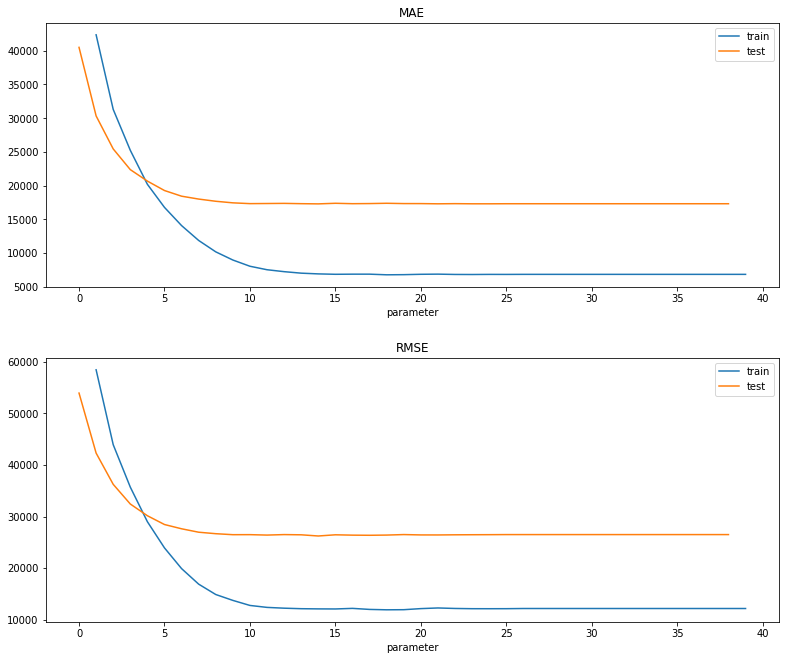

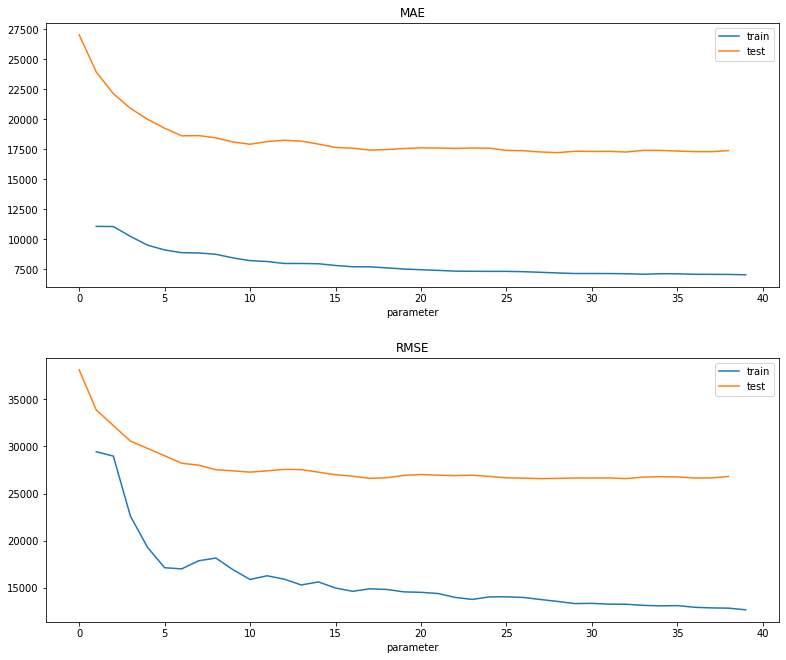

In [184]:
analyzer.analyze_rf(missing_value_mode='median', 
                     standardize=False, 
                     normalize=False, 
                     testSize=0.3,
                     minD=1,
                     maxD=40,
                     minN=1,
                     maxN=40)

## VR

- missing_value_mode='median', standardize=False, normalize=False

In [190]:
analyzer.analyze_vr(missing_value_mode='median', 
                     standardize=False, 
                     normalize=False, 
                     testSize=0.3,
                     best_k=5,
                     best_d=23
                    )

      train_MAE    train_RMSE     test_MAE     test_RMSE
0  10352.166529  17175.167186  19254.86098  31764.313913


Because Voting Regression uses several different models, it has lower performance than individual learning models, but because it uses the results of several different models, it has higher accuracy. It also prevents overfitting, which is very important to us.